In [42]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import jensenshannon
from scipy.stats import ks_2samp, pointbiserialr, chi2_contingency
import numpy as np

pd.set_option('display.max_columns', None)

In [45]:
# Load the dataset
train_df = pd.read_csv('input_data/census_income_learn.csv', header=None)
test_df = pd.read_csv('input_data/census_income_test.csv', header=None)

# Assign column names based on metadata
columns = [
    "age", "class_of_worker", "industry_code", "occupation_code", "education", "wage_per_hour",
    "enrolled_in_edu_inst_last_wk", "marital_status", "major_industry_code", "major_occupation_code",
    "race", "hispanic_origin", "sex", "member_of_labor_union", "reason_for_unemployment",
    "full_or_part_time_employment_stat", "capital_gains", "capital_losses", "dividends_from_stocks",
    "tax_filer_status", "region_of_previous_residence", "state_of_previous_residence",
    "detailed_household_and_family_stat", "detailed_household_summary_in_household",
    "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg",
    "migration_code_move_within_reg", "live_in_this_house_1_year_ago", "migration_prev_res_in_sunbelt",
    "num_persons_worked_for_employer", "family_members_under_18", "country_of_birth_father",
    "country_of_birth_mother", "country_of_birth_self", "citizenship", "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veterans_admin", "veterans_benefits", "weeks_worked_in_year", "year", "income"
]

# Assign column names to the DataFrames
train_df.columns = columns
test_df.columns = columns

# remove instance_weight column, as it is tagged as "ignore" in metadata
train_df = train_df.drop(columns=['instance_weight'])
test_df = test_df.drop(columns=['instance_weight'])


num_features = [
    'age', 'wage_per_hour', 'capital_gains', 'capital_losses',
    'dividends_from_stocks', 'num_persons_worked_for_employer',
    'weeks_worked_in_year'
]

cat_features = [col for col in train_df.columns if col not in num_features and col != 'income']


# Display the first row of each DataFrame
print ("let's look at train dataset")
display (train_df.head(1))
print ("\n")
print ("let's look at test dataset")
display (test_df.head(1))

let's look at train dataset


,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.




let's look at test dataset


,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_status,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code_change_in_msa,migration_code_change_in_reg,migration_code_move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.


In [46]:
print ("numerical features: ", num_features)
print ("calegorical features: ", cat_features)

numerical features:  ['age', 'wage_per_hour', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'num_persons_worked_for_employer', 'weeks_worked_in_year']
calegorical features:  ['class_of_worker', 'industry_code', 'occupation_code', 'education', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code_change_in_msa', 'migration_code_change_in_reg', 'migration_code_move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', 'fill_inc_questionnaire_for_veterans_adm

In [47]:
# Check for missing values in train and test datasets
print('Missing values in train_df:')
missing_train = train_df.isnull().sum()
missing_train = missing_train[missing_train > 0]
if not missing_train.empty:
    print(missing_train)
else:
    print("None of the columns have missing values!")

print('\nMissing values in test_df:')
missing_test = test_df.isnull().sum()
missing_test = missing_test[missing_test > 0]
if not missing_test.empty:
    print(missing_test)
else:
    print("None of the columns have missing values!")

Missing values in train_df:
None of the columns have missing values!

Missing values in test_df:
None of the columns have missing values!


In [48]:
# Proportion of target variable (income) in train and test datasets
print('Proportion of target variable in train_df:')
print(train_df['income'].value_counts(normalize=True) * 100)
print('\nProportion of target variable in test_df:')
print(test_df['income'].value_counts(normalize=True) * 100)

Proportion of target variable in train_df:
 - 50000.    93.794199
 50000+.      6.205801
Name: income, dtype: float64

Proportion of target variable in test_df:
 - 50000.    93.799242
 50000+.      6.200758
Name: income, dtype: float64


In [49]:
# -----------------------------------------------
# Data Quality Checks: Duplicate & Outlier Handling
# -----------------------------------------------
# This block performs essential data cleaning tasks:
# 1. Identifies and removes duplicate rows in both train and test datasets.
#    - First checks full duplicates (all columns).
#    - Then identifies rows where all features are the same but the target differs (label noise).
# 2. Detects outliers in continuous variables using the IQR method.
#    - Reports only features that contain outliers in either dataset.
# 3. Detects zero variance columns that may not be informative for modeling.

# ========== DUPLICATE CHECKS ==========

print(f"Original train size: {train_df.shape[0]}")
print(f"Original test size: {test_df.shape[0]}\n")

# Check full duplicates
full_dup_train = train_df.duplicated()
full_dup_test = test_df.duplicated()

print(f"Train - full duplicates (all columns): {full_dup_train.sum()}")
print(f"Test  - full duplicates (all columns): {full_dup_test.sum()}")

# Check duplicates based on features only (excluding target)
feature_cols = [col for col in train_df.columns if col != 'income']
feat_dup_train = train_df.duplicated(subset=feature_cols)
feat_dup_test = test_df.duplicated(subset=feature_cols)

print(f"Train - duplicates based on features only: {feat_dup_train.sum()}")
print(f"Test  - duplicates based on features only: {feat_dup_test.sum()}")

# Remove duplicates from train and test (based on features only)
train_df = train_df[~feat_dup_train]
test_df = test_df[~feat_dup_test]

print(f"\nTrain size after removing feature-only duplicates: {train_df.shape[0]}")
print(f"Test size after removing feature-only duplicates: {test_df.shape[0]}\n")

# ========== OUTLIER CHECKS ==========

continuous_columns = [
    'age', 'wage_per_hour', 'capital_gains', 'capital_losses',
    'dividends_from_stocks', 'num_persons_worked_for_employer',
    'weeks_worked_in_year'
]

print("Outlier check using IQR method:")

# Train
for col in continuous_columns:
    q1, q3 = train_df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = train_df[(train_df[col] < lb) | (train_df[col] > ub)]
    if len(outliers) > 0:
        print(f"Train - {col}: {len(outliers)} outliers")

# Test
for col in continuous_columns:
    q1, q3 = test_df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = test_df[(test_df[col] < lb) | (test_df[col] > ub)]
    if len(outliers) > 0:
        print(f"Test  - {col}: {len(outliers)} outliers")

# ========== ZERO VARIANCE CHECK ==========

print("\nZero variance column check:")

zero_var_train = train_df.loc[:, train_df.nunique() == 1]
zero_var_test = test_df.loc[:, test_df.nunique() == 1]

if not zero_var_train.empty:
    print(f"Train - Zero variance columns: {list(zero_var_train.columns)}")
else:
    print("Train - No zero variance columns.")

if not zero_var_test.empty:
    print(f"Test  - Zero variance columns: {list(zero_var_test.columns)}")
else:
    print("Test  - No zero variance columns.")

Original train size: 199523
Original test size: 99762

Train - full duplicates (all columns): 46627
Test  - full duplicates (all columns): 20898
Train - duplicates based on features only: 46716
Test  - duplicates based on features only: 20936

Train size after removing feature-only duplicates: 152807
Test size after removing feature-only duplicates: 78826

Outlier check using IQR method:
Train - wage_per_hour: 11302 outliers
Train - capital_gains: 7374 outliers
Train - capital_losses: 3905 outliers
Train - dividends_from_stocks: 21079 outliers
Test  - wage_per_hour: 5584 outliers
Test  - capital_gains: 3720 outliers
Test  - capital_losses: 1908 outliers
Test  - dividends_from_stocks: 10514 outliers

Zero variance column check:
Train - No zero variance columns.
Test  - No zero variance columns.


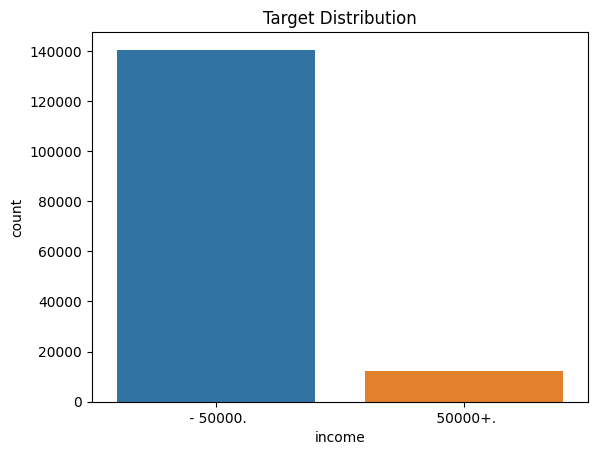

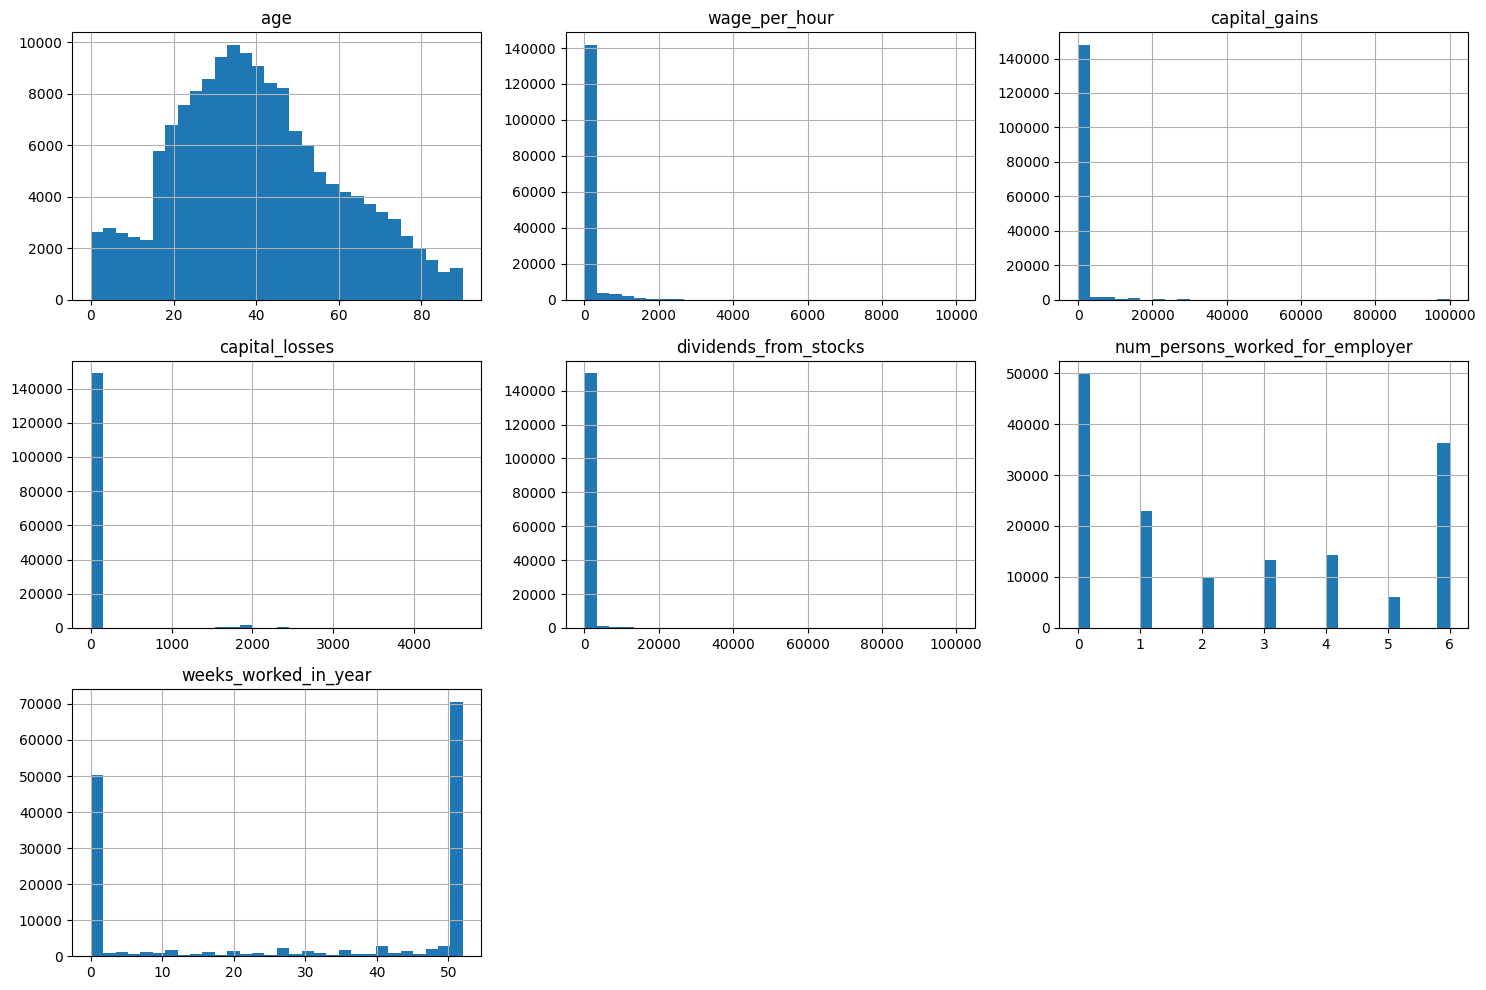

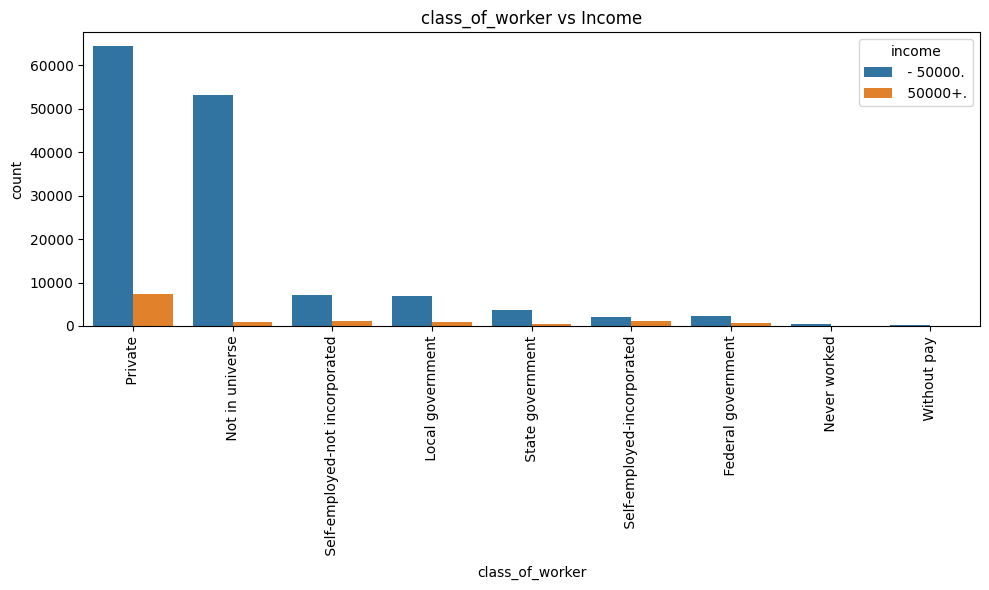

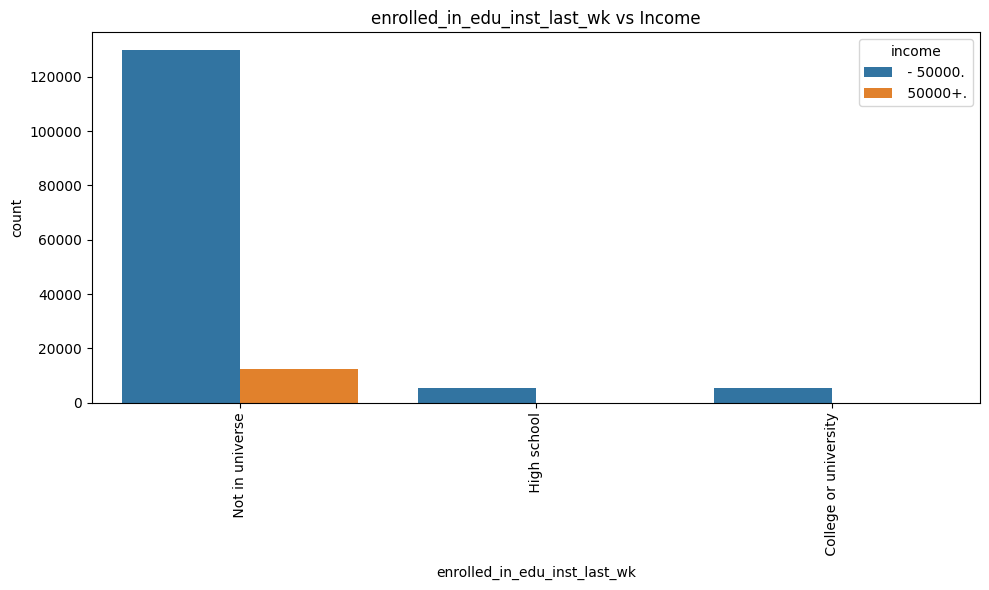

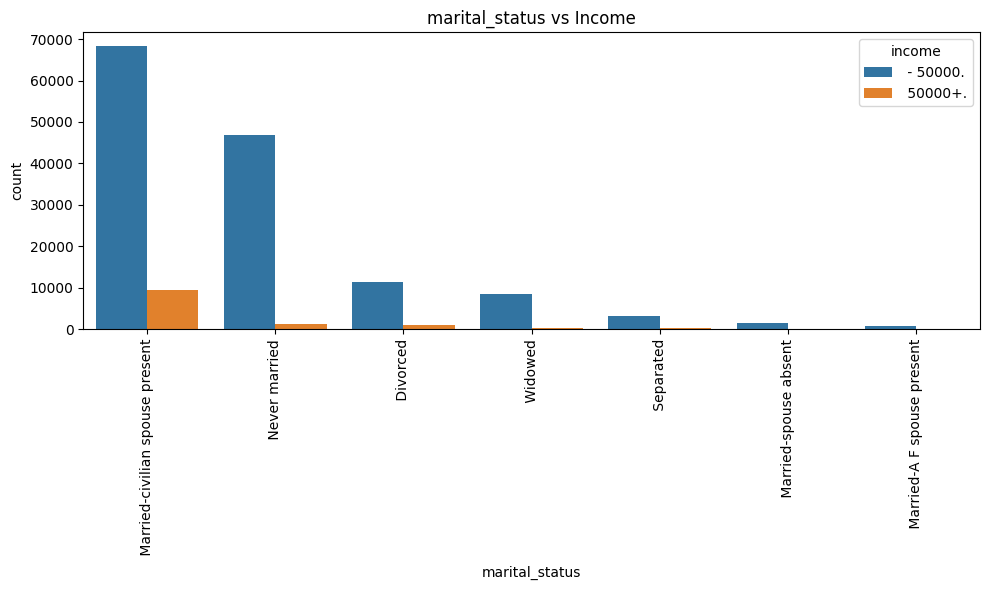

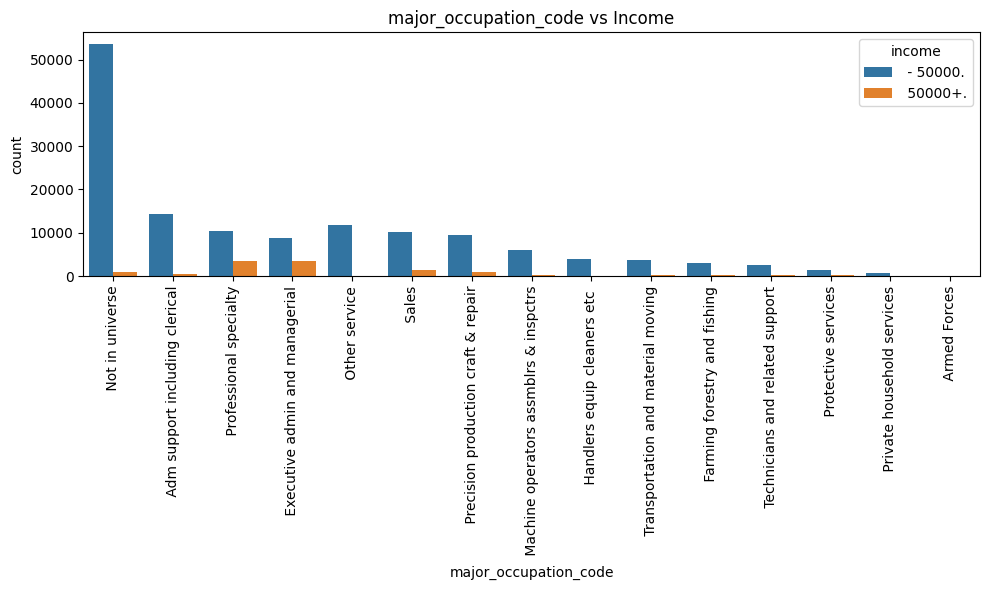

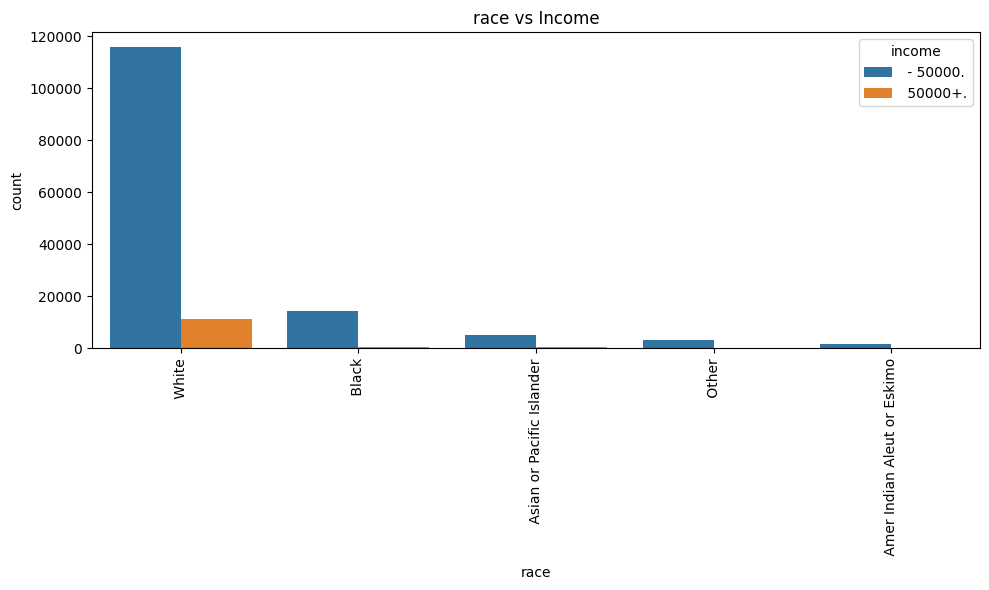

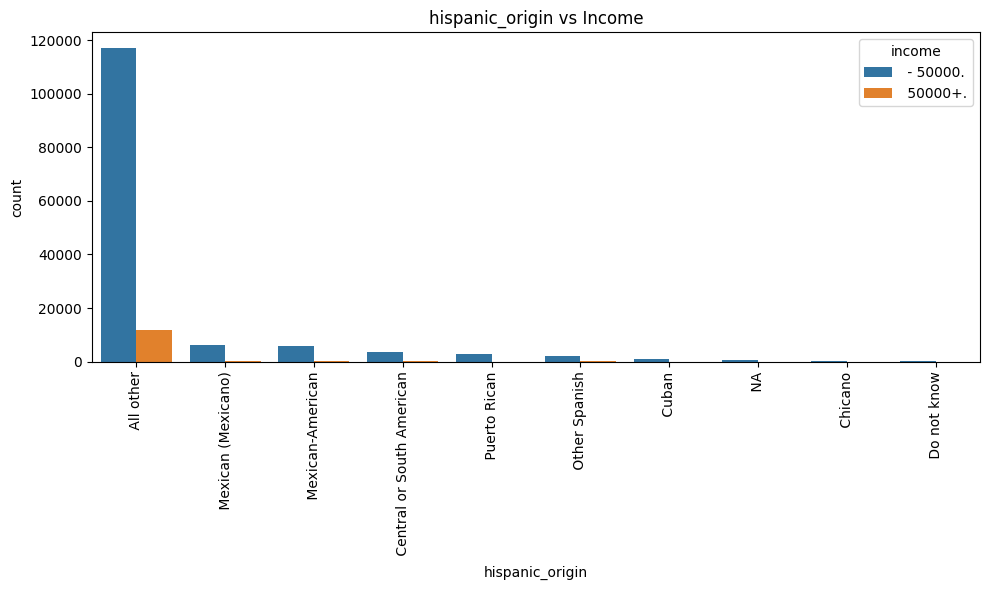

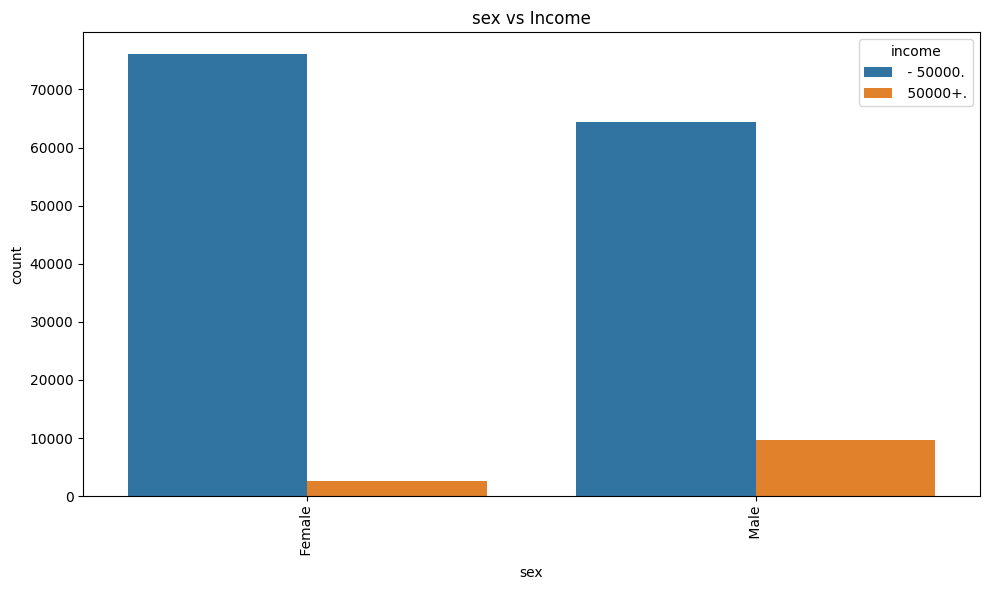

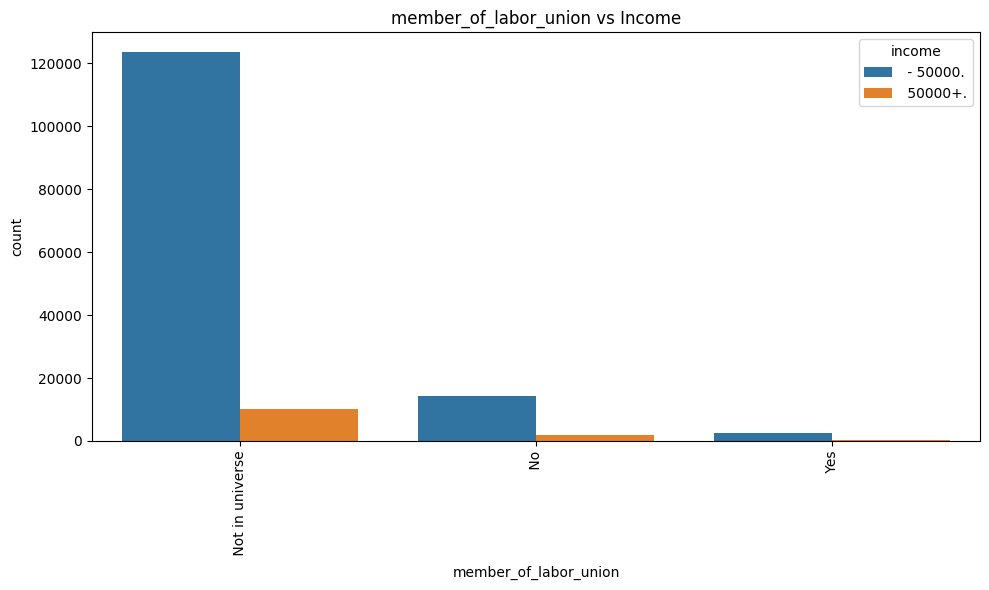

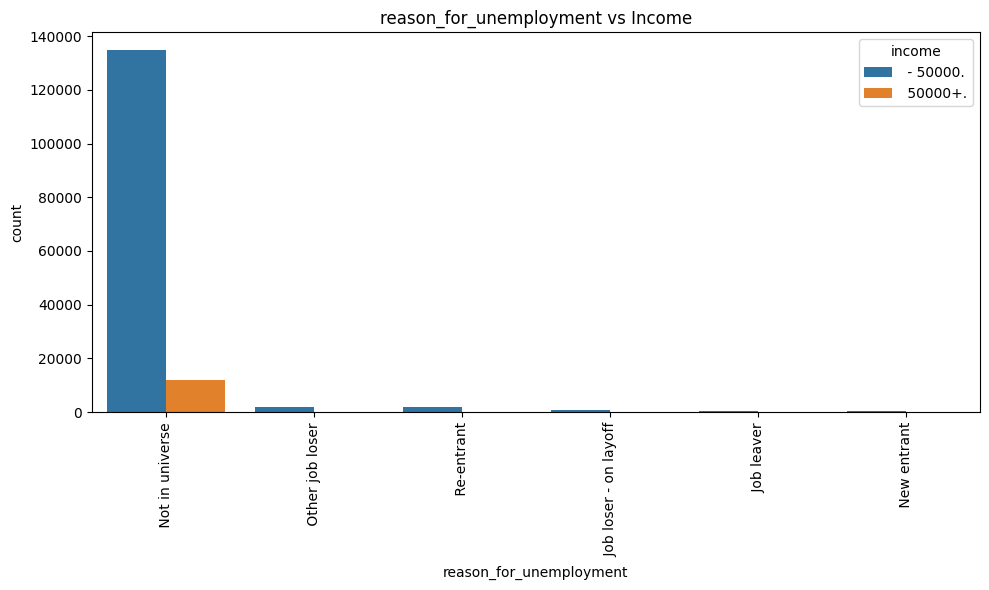

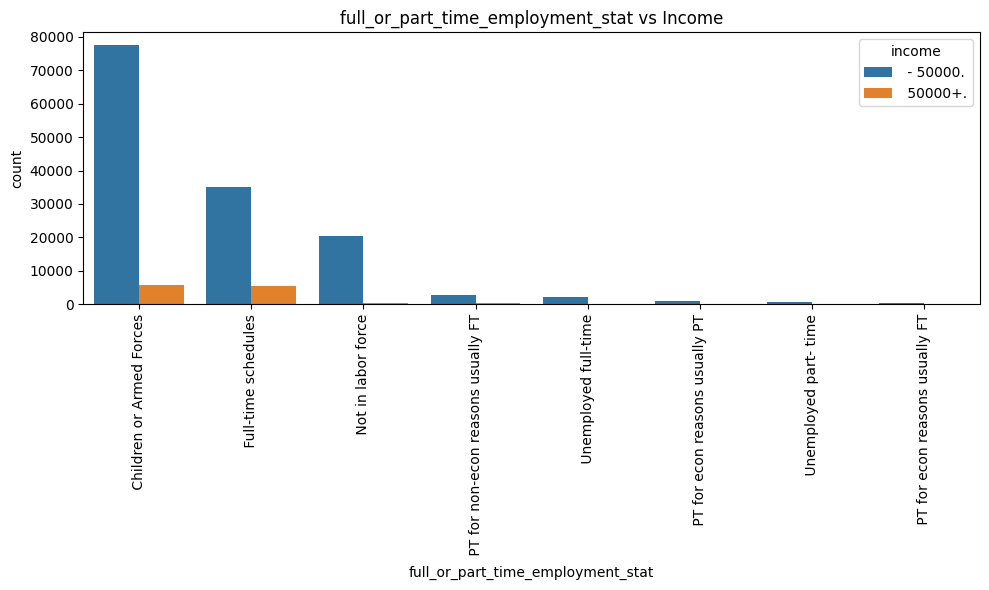

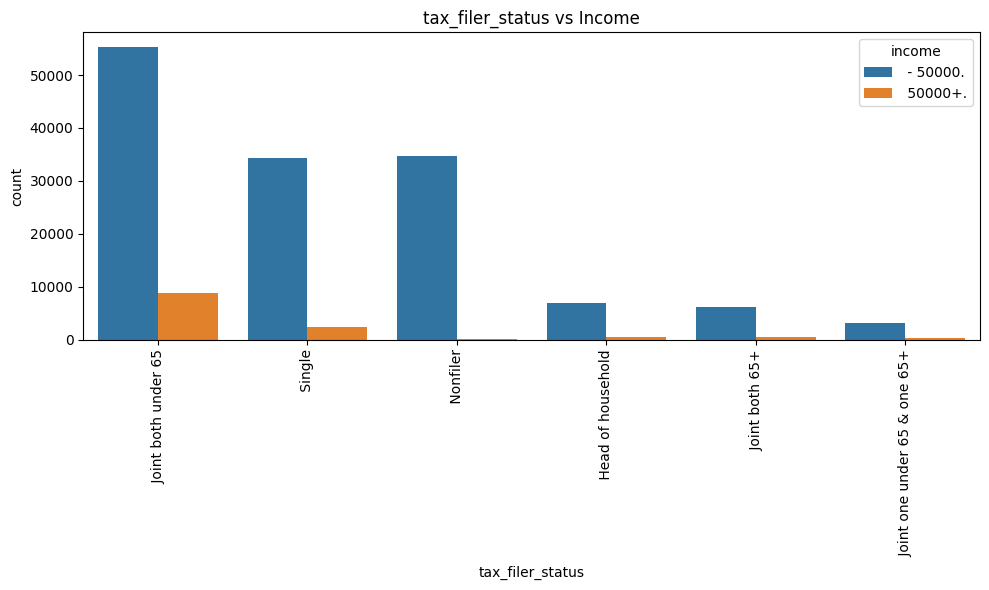

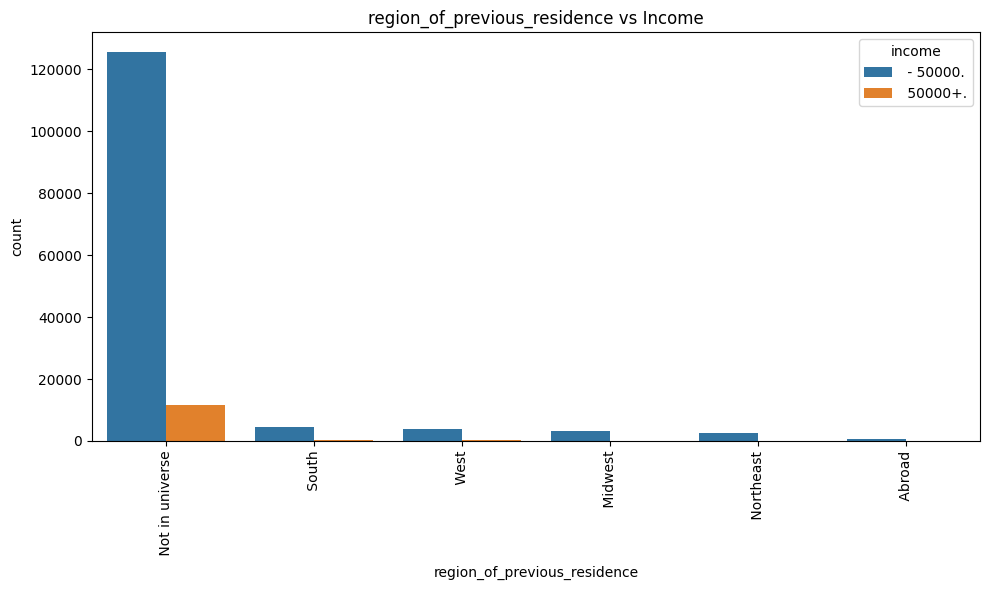

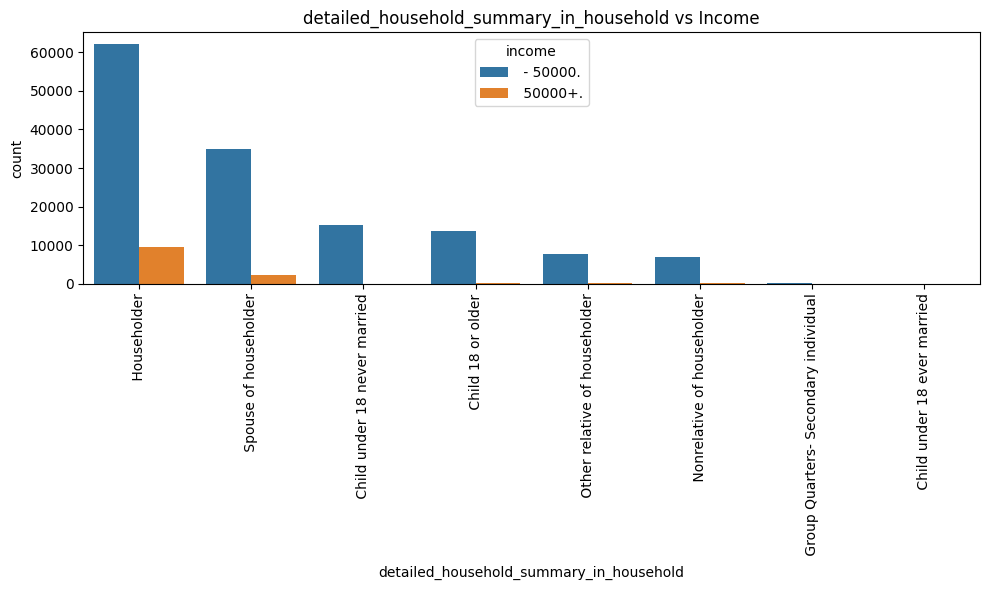

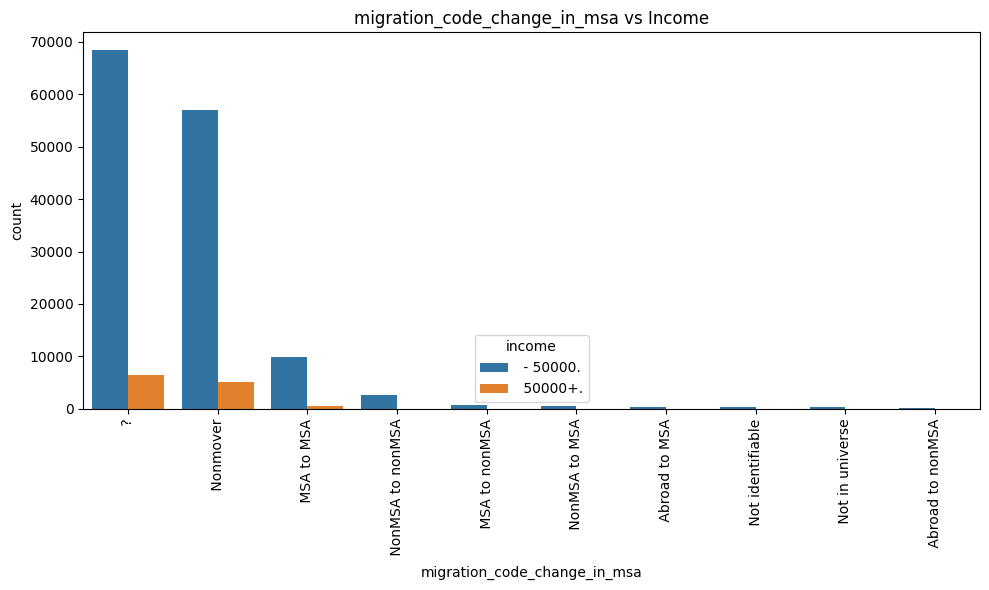

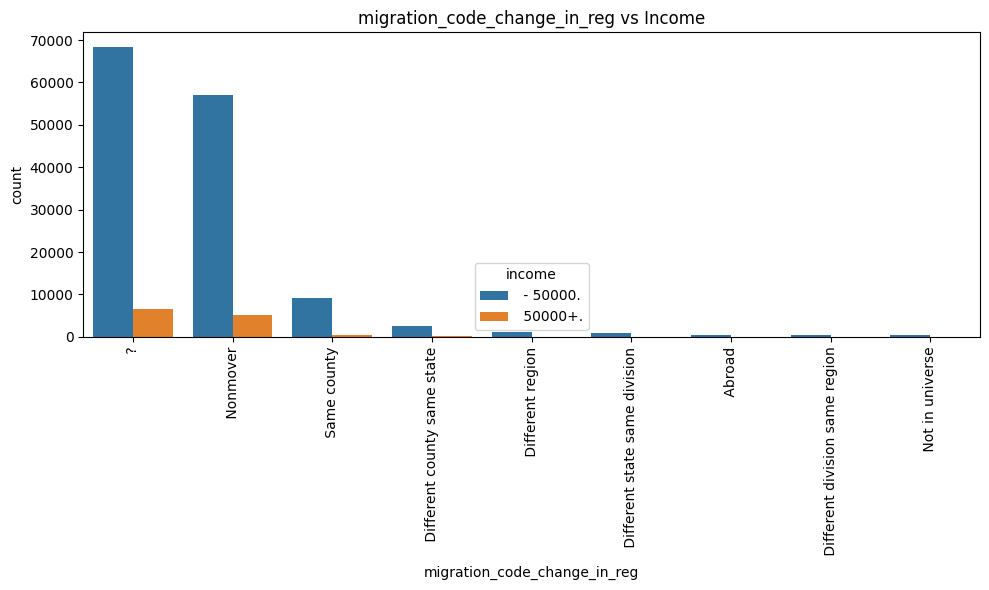

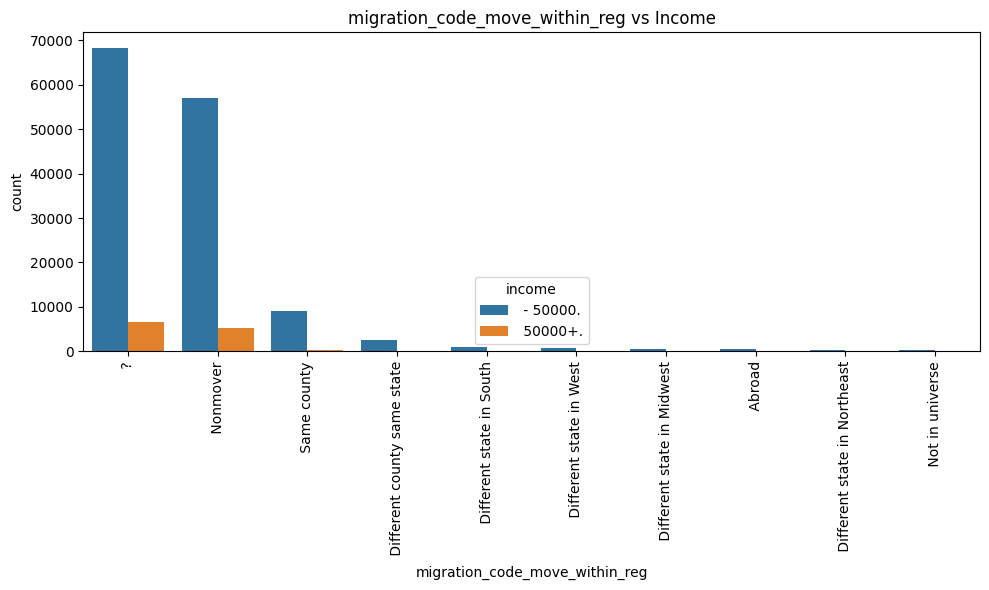

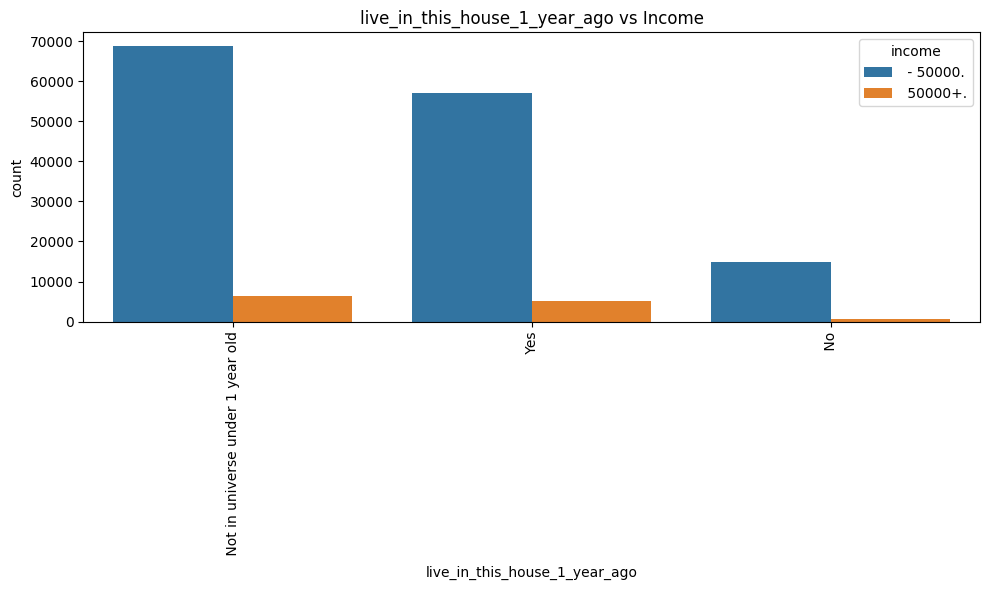

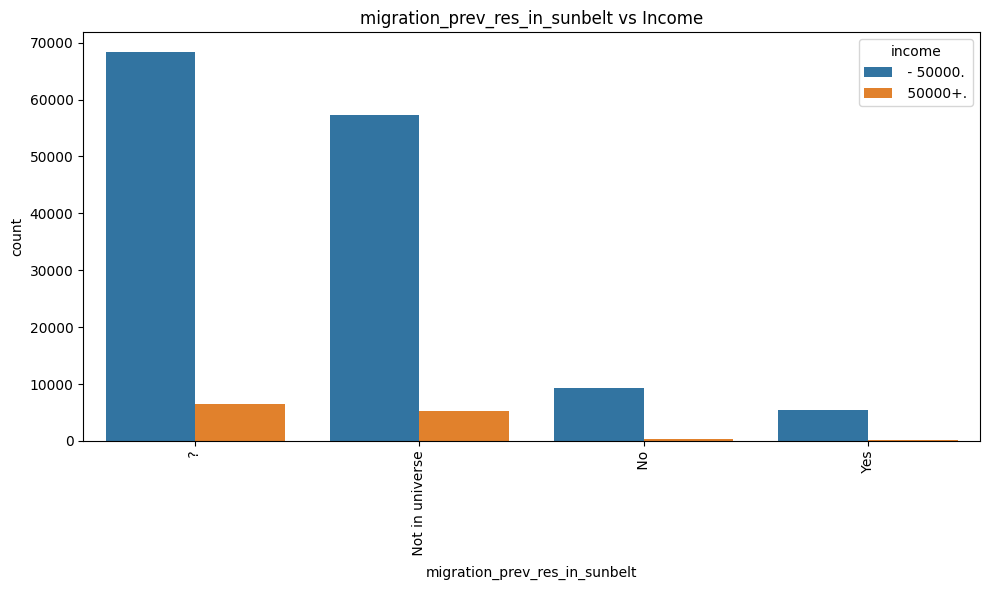

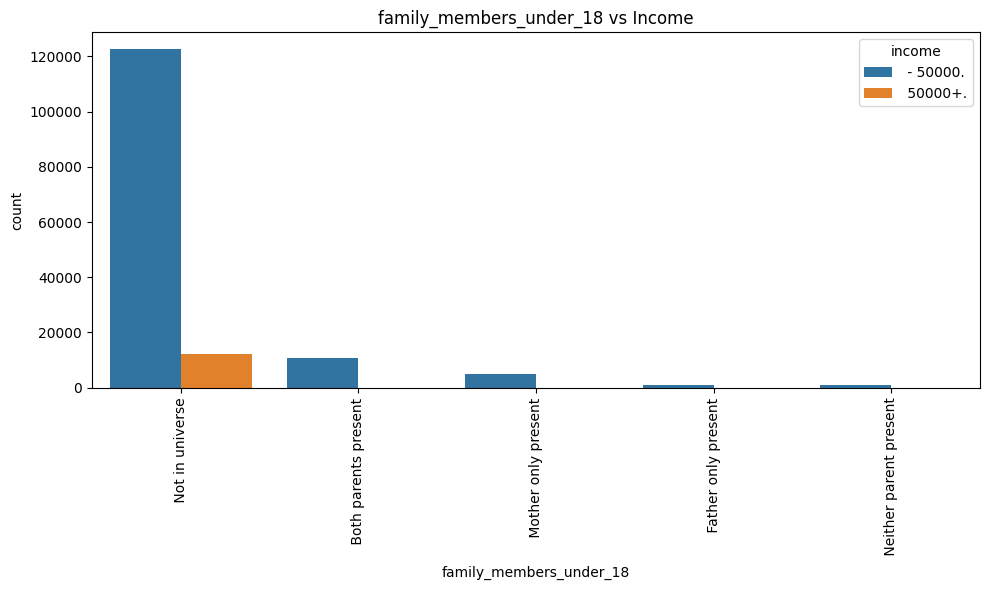

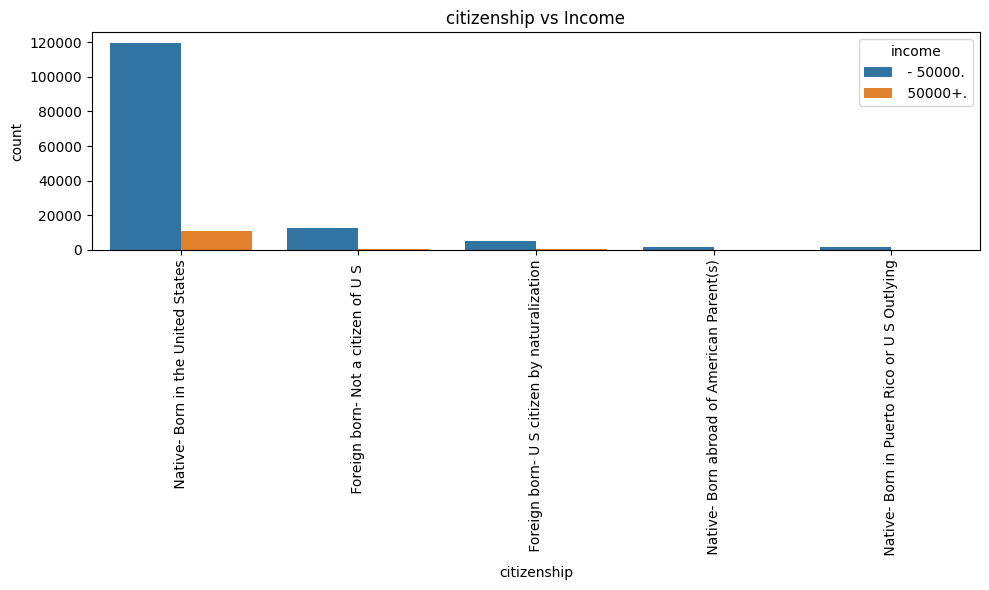

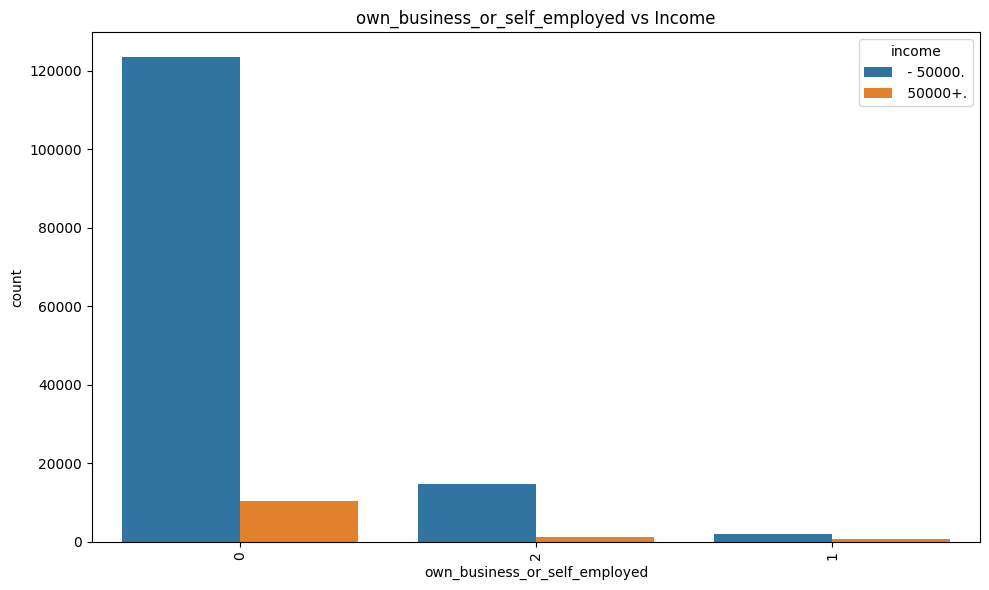

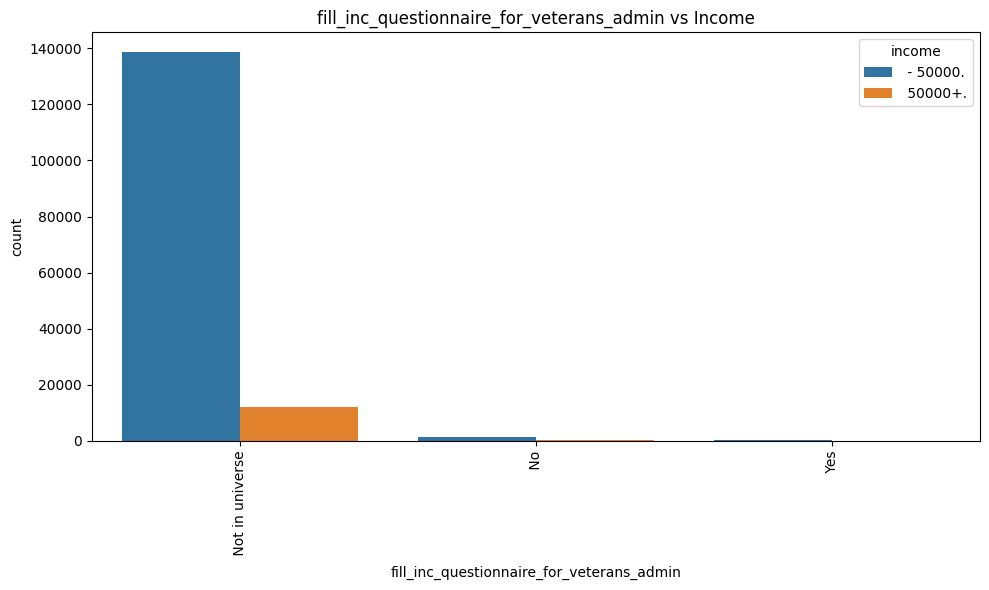

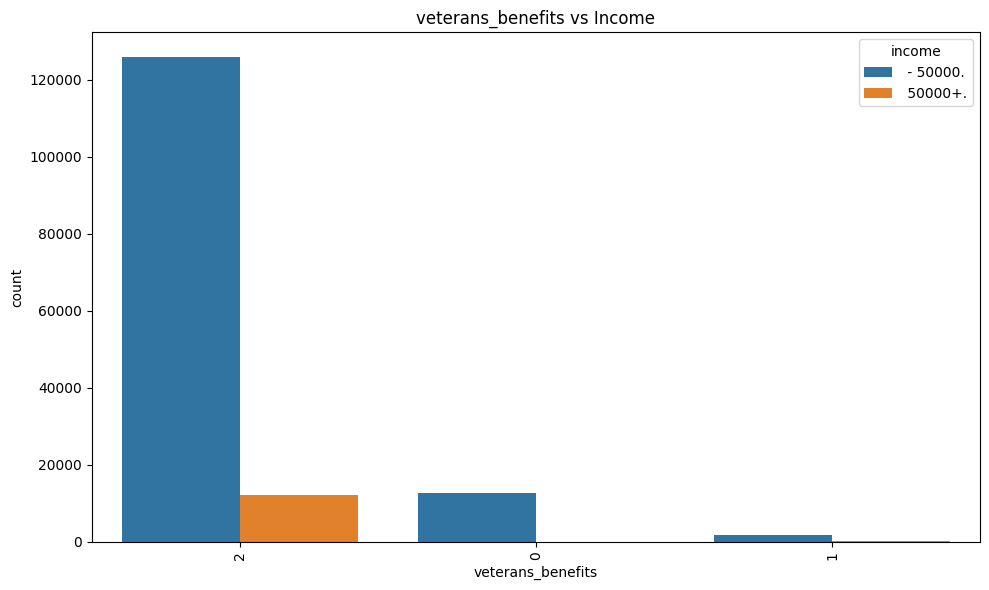

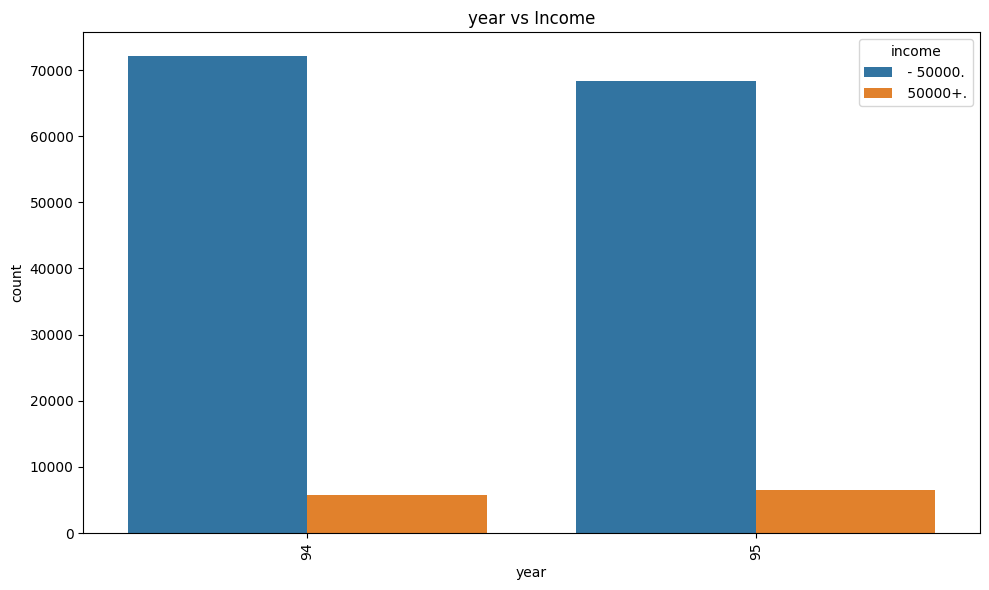

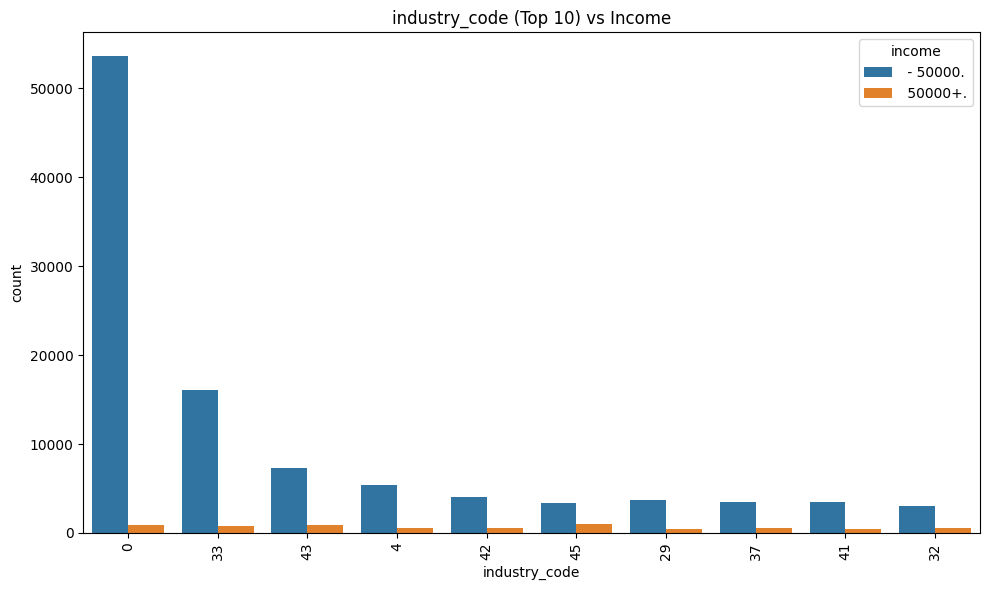

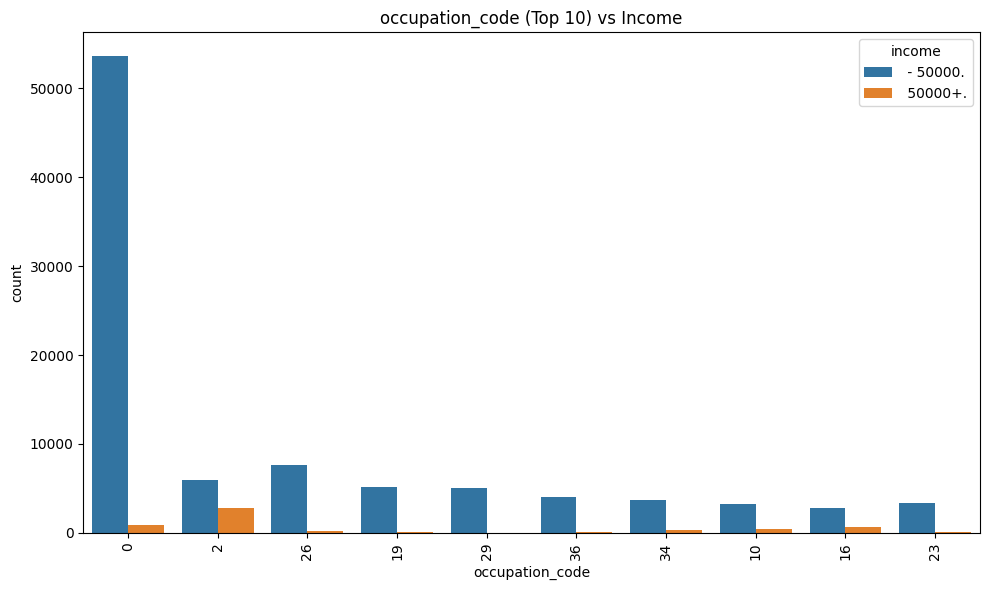

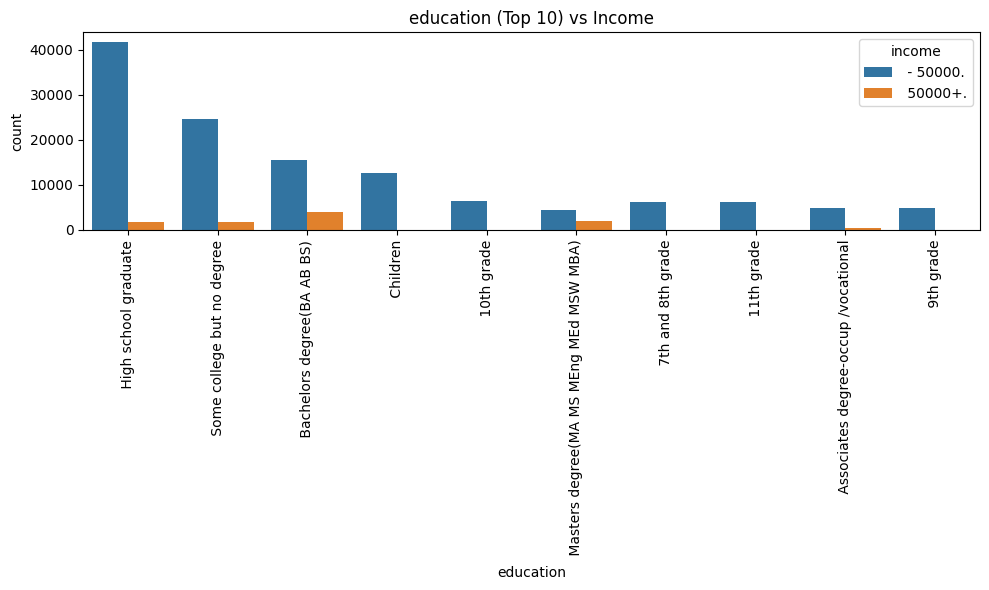

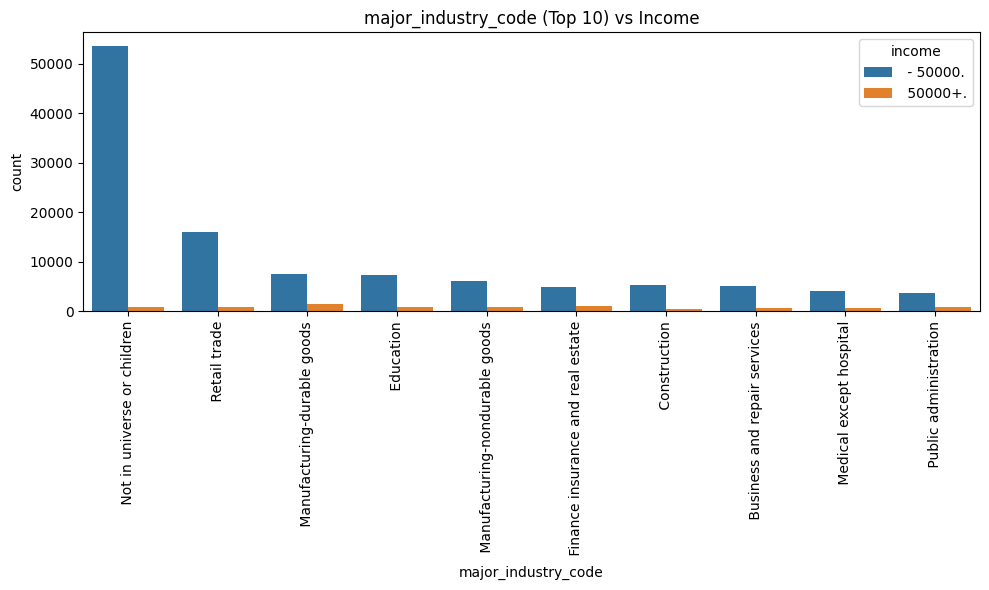

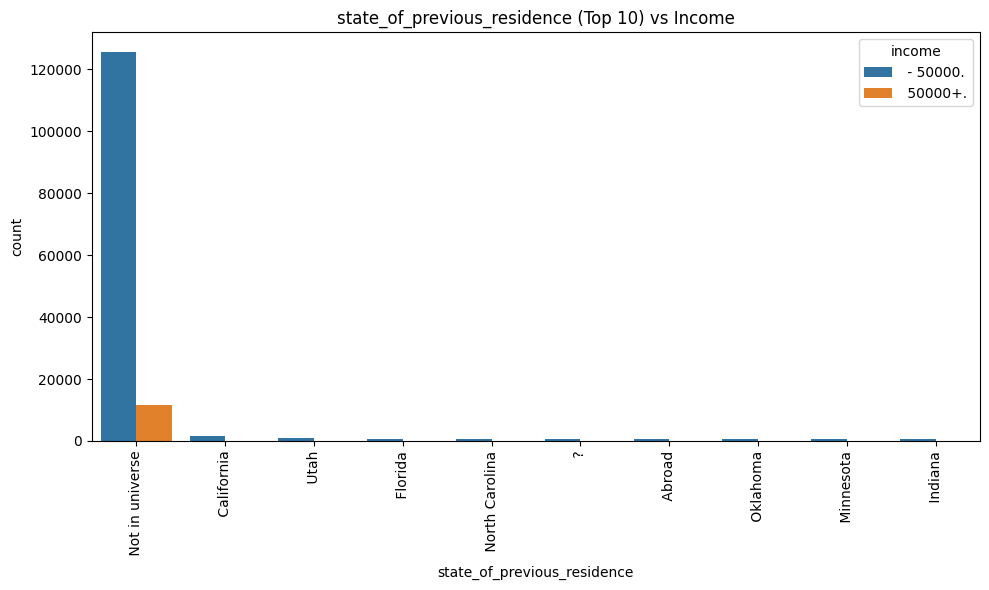

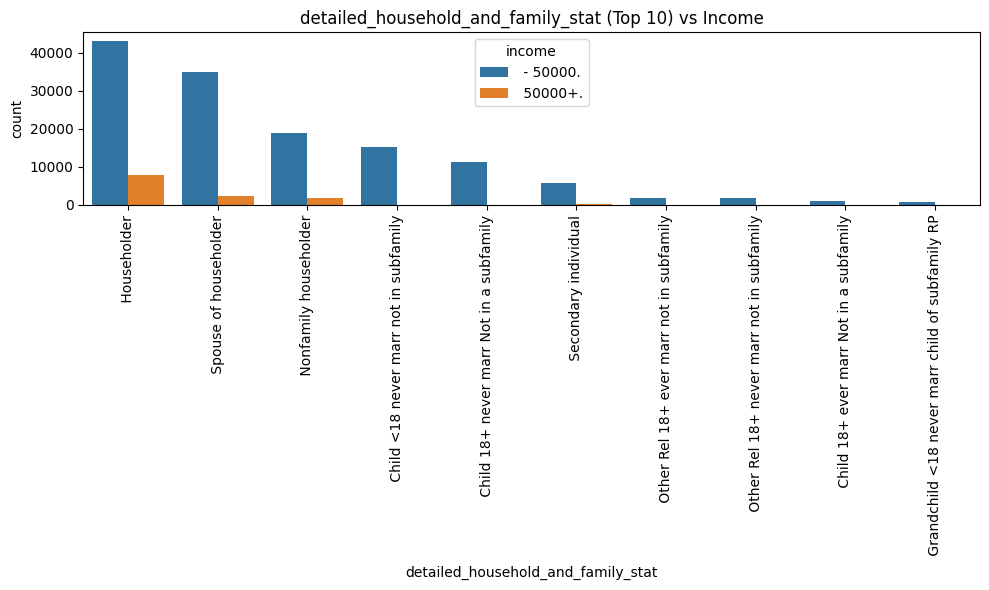

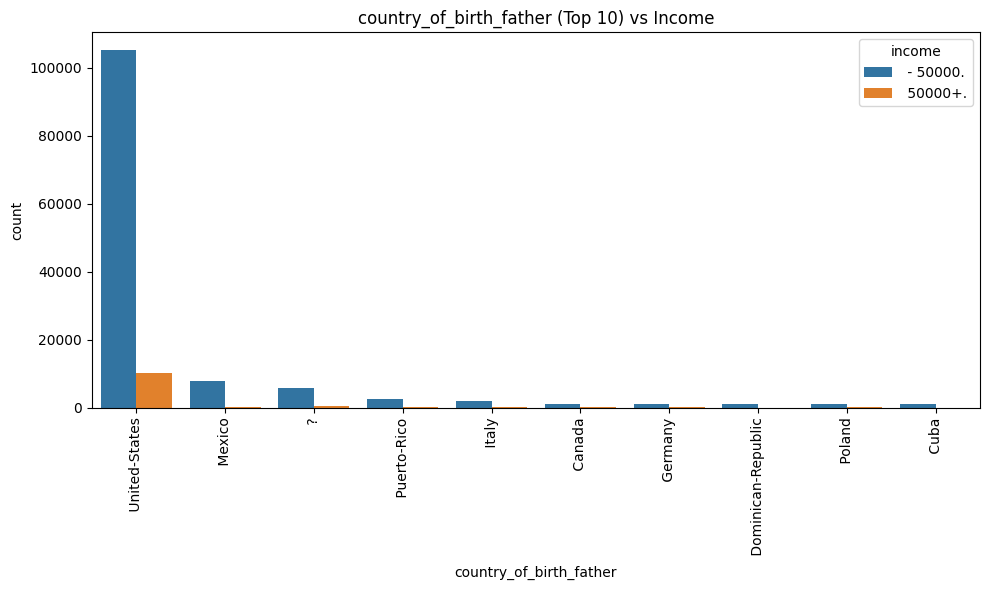

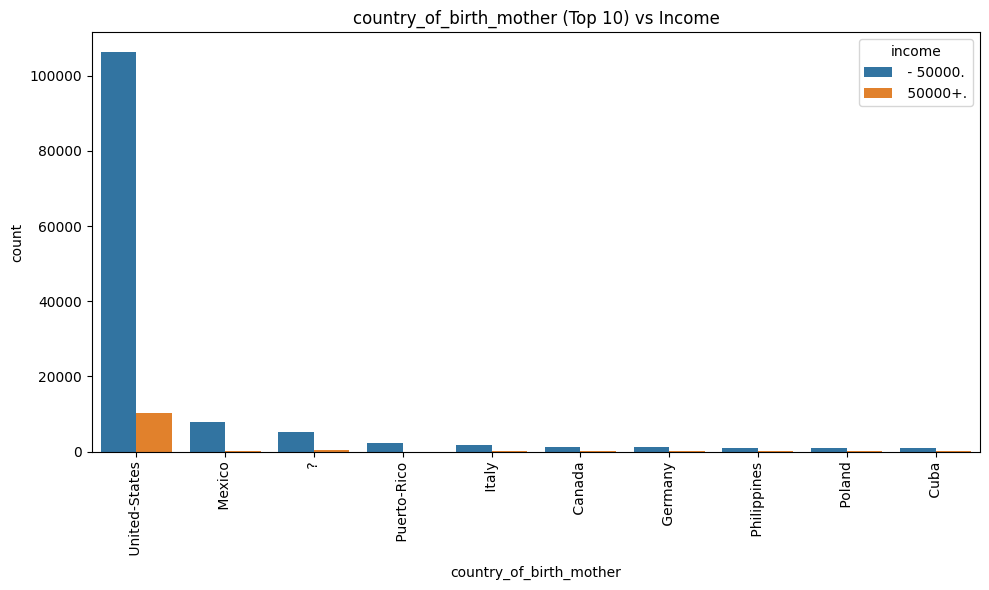

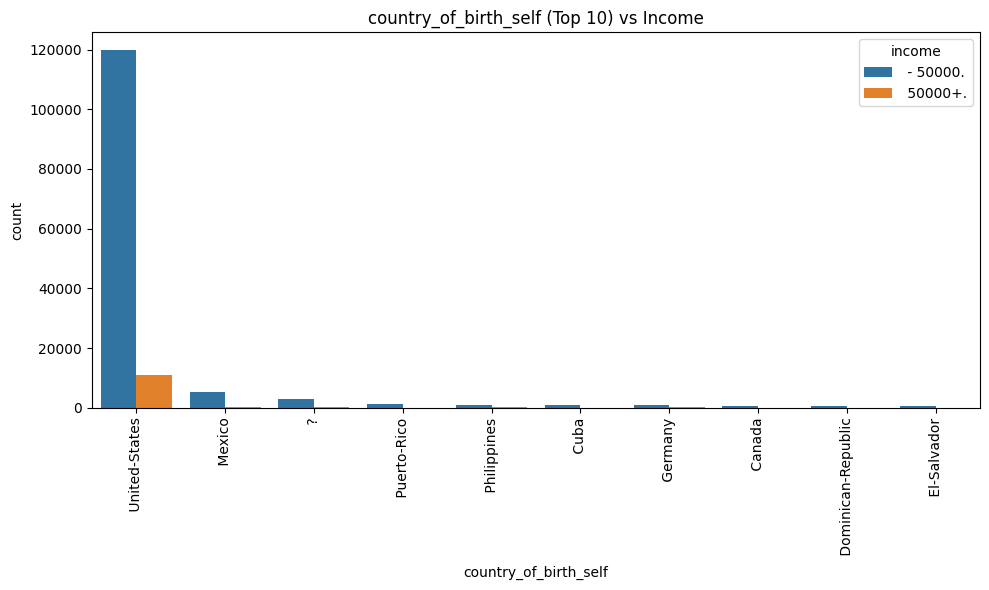

In [50]:
# Target Distribution
sns.countplot(data=train_df, x='income')
plt.title("Target Distribution")
plt.show()

# Numeric Distribution (all numeric columns)
train_df[num_features].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Enhanced Categorical Summary (covers all)
cat_cardinality = train_df[cat_features].nunique()

low_card_cats = cat_cardinality[cat_cardinality <= 15].index.tolist()
high_card_cats = cat_cardinality[cat_cardinality > 15].index.tolist()

# Low-cardinality plots
for col in low_card_cats:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=col, hue='income',
                  order=train_df[col].value_counts().index)
    plt.xticks(rotation=90, ha='center')
    plt.title(f"{col} vs Income")
    plt.tight_layout()
    plt.show()

# High-cardinality plots (Top 10)
for col in high_card_cats:
    top_vals = train_df[col].value_counts().nlargest(10).index
    subset = train_df[train_df[col].isin(top_vals)]
    plt.figure(figsize=(10, 6))
    sns.countplot(data=subset, x=col, hue='income', order=top_vals)
    plt.xticks(rotation=90, ha='center')
    plt.title(f"{col} (Top 10) vs Income")
    plt.tight_layout()
    plt.show()

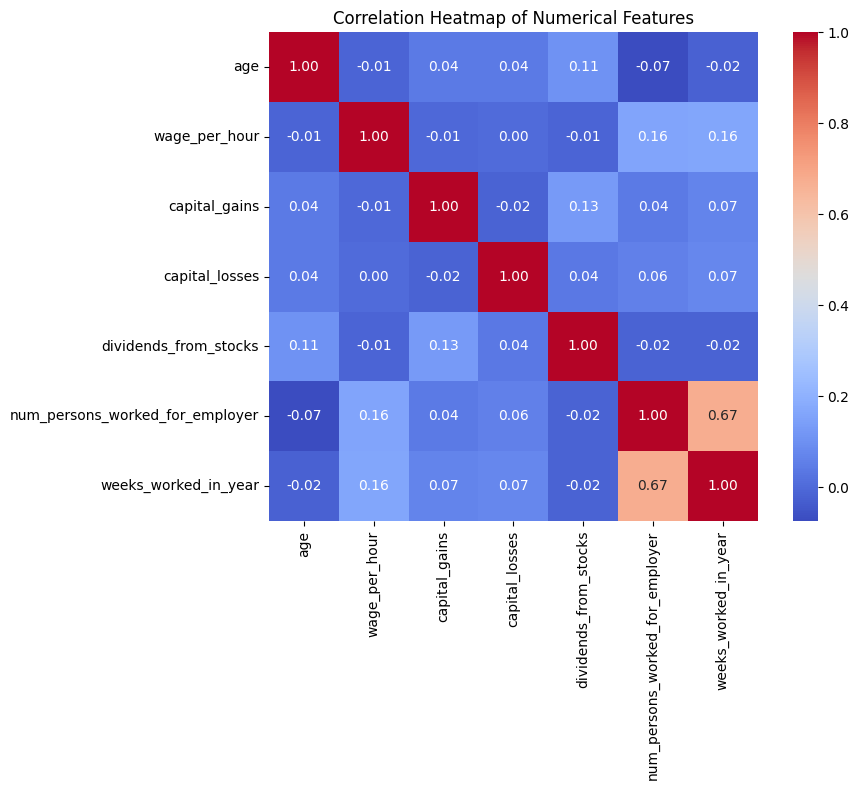

/Users/mikayilahadli/Documents/Python/dataiku/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


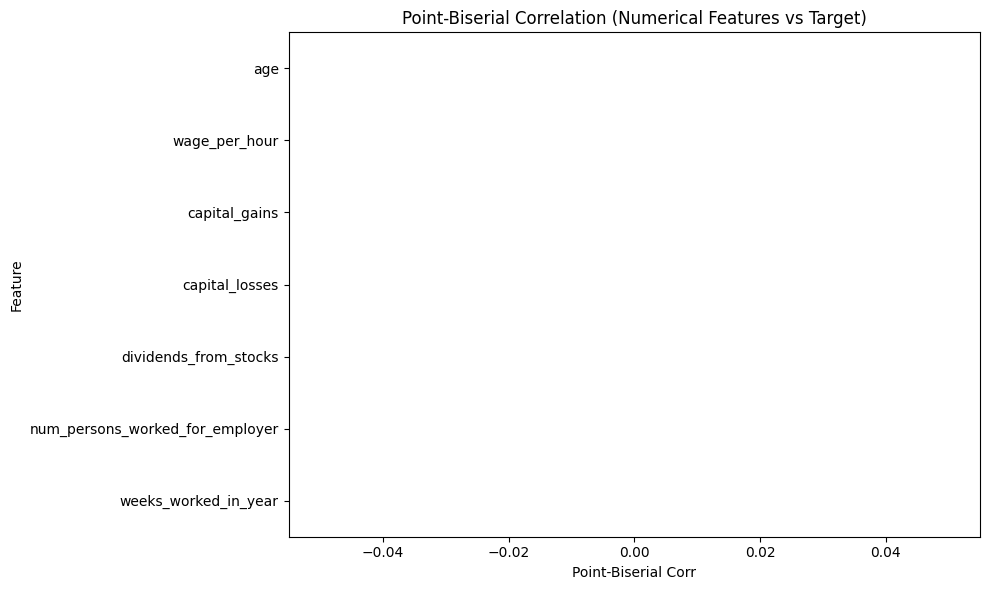

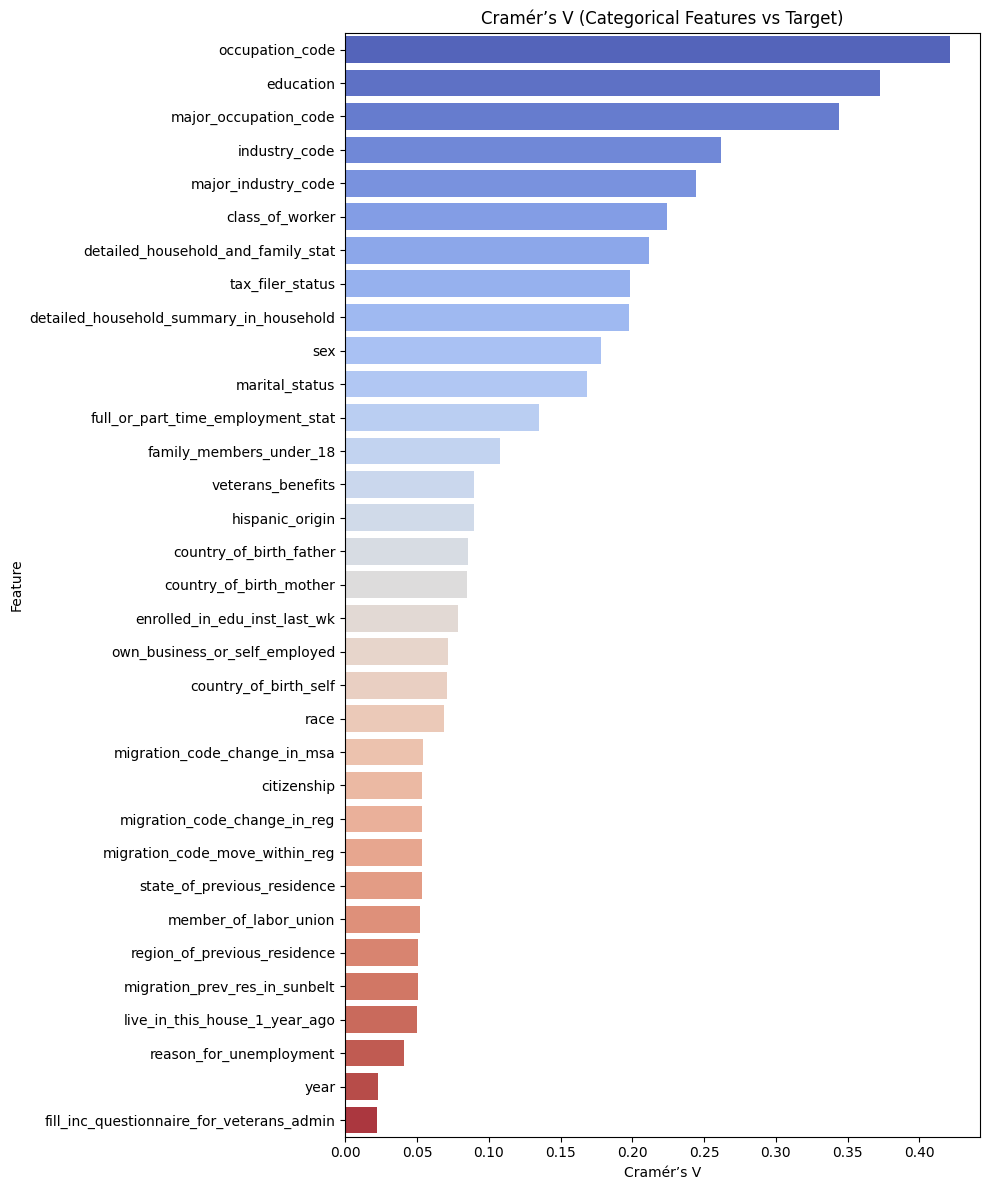

In [53]:
# -----------------------------------------------
# Feature Correlation Analysis (Visual Summary)
# -----------------------------------------------
# This block performs and visualizes correlations:
# 1. Pearson correlation between numerical features (heatmap).
# 2. Point-biserial correlation between numerical features and binary target (bar plot).
# 3. Cramér’s V between categorical features and binary target (bar plot).
# These help detect multicollinearity and identify predictive features.


# ===== 1. Correlation Heatmap (Numerical Features) =====
corr = train_df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# ===== 2. Point-Biserial Correlation (Numerical vs Target) =====
target_binary = train_df['income'].apply(lambda x: 1 if '>50K' in x else 0)

pb_results = []
for col in num_features:
    corr_val, _ = pointbiserialr(train_df[col], target_binary)
    pb_results.append((col, corr_val))

pb_df = pd.DataFrame(pb_results, columns=['Feature', 'Point-Biserial Corr'])
pb_df = pb_df.sort_values(by='Point-Biserial Corr', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=pb_df, x='Point-Biserial Corr', y='Feature', palette='viridis')
plt.title("Point-Biserial Correlation (Numerical Features vs Target)")
plt.tight_layout()
plt.show()

# ===== 3. Cramér’s V (Categorical vs Target) =====
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cv_results = []
for col in cat_features:
    confusion_matrix = pd.crosstab(train_df[col], train_df['income'])
    if confusion_matrix.shape[0] > 1 and confusion_matrix.shape[1] > 1:
        cv = cramers_v(confusion_matrix)
        cv_results.append((col, cv))

cv_df = pd.DataFrame(cv_results, columns=['Feature', 'Cramér’s V'])
cv_df = cv_df.sort_values(by="Cramér’s V", ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(data=cv_df, x="Cramér’s V", y="Feature", palette='coolwarm')
plt.title("Cramér’s V (Categorical Features vs Target)")
plt.tight_layout()
plt.show()

In [ ]:
# This block compares the distribution of features between the train and test sets.
# For numerical features, it uses the Kolmogorov–Smirnov (KS) test to detect significant differences.
# For categorical features, it uses the Jensen–Shannon (JS) distance to measure how similar the category distributions are.
# The goal is to identify data drift or distribution shifts that could affect model performance or generalization.

diff_numerical = []
diff_categorical = []

# KS test for numeric features
for col in num_features:
    p_value = ks_2samp(train_df[col], test_df[col])[1]
    if p_value < 0.05:
        diff_numerical.append((col, round(p_value, 4)))

# JS distance for categorical features
for col in cat_features:
    train_dist = train_df[col].value_counts(normalize=True)
    test_dist = test_df[col].value_counts(normalize=True)
    all_vals = train_dist.index.union(test_dist.index)
    js_dist = jensenshannon(train_dist.reindex(all_vals, fill_value=0),
                            test_dist.reindex(all_vals, fill_value=0))
    if js_dist > 0.1:
        diff_categorical.append((col, round(js_dist, 4)))

# Output results
if diff_numerical or diff_categorical:
    if diff_numerical:
        print("🔹 Numerical features with distribution differences (p < 0.05):")
        for col, p in diff_numerical:
            print(f" - {col}: KS p-value = {p}")
    if diff_categorical:
        print("\n🔸 Categorical features with distribution differences (JS distance > 0.1):")
        for col, js in diff_categorical:
            print(f" - {col}: JS distance = {js}")
else:
    print("✅ No difference between train and test set has been observed (within thresholds).")

✅ No difference between train and test set has been observed (within thresholds).


## 🔍 EDA Summary: Key Insights

- **Target variable is imbalanced**  
  Only ~6% of records fall into the `>50K` income group. This imbalance may negatively affect models if not addressed. To handle this, I will use oversampling method of SMOTE, and using F1-score as metric

- **Duplicates were found and removed**  
  Both full duplicates (same features and target) and feature-only duplicates (same features, conflicting target) were identified. Keeping these would inject noise and mislead model training.

- **Outliers are present in several numerical features**  
  Especially in `capital_gains`, `dividends_from_stocks`, and `wage_per_hour`. These are problematic for linear models like Logistic Regression, but less impactful for tree-based models like Random Forest or XGBoost.

- **No NULL values are present**  
  However, some categorical values like `"Not in universe"` indicate inapplicable entries based on survey routing. These should be treated as valid categories rather than missing values.

- **No zero-variance columns**  
  All features show variability, meaning they can potentially contribute useful signal to the model.

- **No multicollinearity among numeric features**  
  The correlation heatmap shows most numerical features are weakly correlated. Only `num_persons_worked_for_employer` and `weeks_worked_in_year` had moderate correlation.

- **Weak linear relationships between numeric features and target**  
  Point-biserial correlations are close to zero. These features may not be strong predictors on their own, especially for linear models.

- **Several categorical features show strong association with the target**  
  Based on Cramér’s V, features like `education`, `occupation_code`, `class_of_worker`, and `major_occupation_code` have a significant relationship with income. These will be prioritized in encoding strategies.

- **High-cardinality categorical features are present**  
  Columns like `occupation_code`, `industry_code`, and `country_of_birth_self` have many unique values. I will consider **target encoding** or **frequency encoding** rather than one-hot encoding to avoid high dimensionality.

- **Income disparity across gender and race is visible**  
  From categorical visualizations:
  - **Males** are significantly more likely to earn `>50K` than females.
  - **White** and **Asian-Pac-Islander** groups are more represented in the `>50K` income bracket compared to other racial groups.
  These trends highlight **potential bias in the dataset**.

- **Fairness and bias mitigation should be considered**  
  To address potential discrimination or unintended bias in model outcomes (especially for gender and race), I will consider:
  - Adding **fairness-aware modeling techniques**
  - Monitoring **disparate impact**
  - Exploring tools like **AIF360**, **Fairlearn**, or custom bias audits
  - Possibly excluding sensitive attributes or applying debiasing strategies